# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [2]:
# импорт всех необходимых библиотек
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from scipy import stats as st

In [6]:
# загрузка данных
df1 = pd.read_csv('geo_data_0.csv')
df2 = pd.read_csv('geo_data_1.csv')
df3 = pd.read_csv('geo_data_2.csv')

Получим основную информауию по каждому региону

In [7]:
sl = [df1, df2, df3]
def info(df, index):
    print('****************************************************************************************************\n')
    print('регион', index, '\n')
    print('Данные')
    display(df.head(3))
    print('Информация\n')
    print(df.info())
    print('\n')
    print('Описание\n')
    print(df.describe())
    print('****************************************************************************************************')

for i in range(len(sl)):
    info(sl[i], i+1)

****************************************************************************************************

регион 1 

Данные


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


Информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Описание

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max      

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


Информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Описание

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max      

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


Информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Описание

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max      

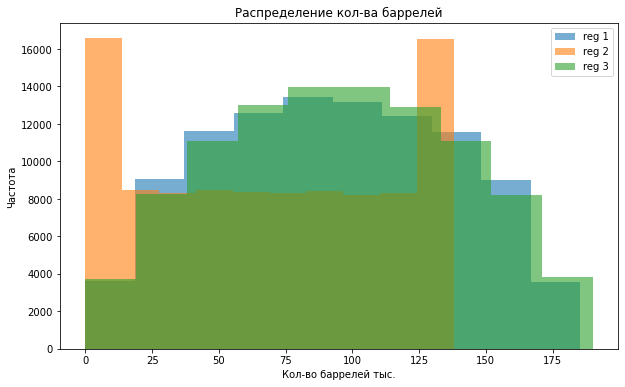

In [8]:
fig, ax = plt.subplots(1, figsize = (10, 6))
ax = df1['product'].plot(kind = 'hist', label = 'reg 1', alpha = 0.6, bins = 10, title = 'Распределение кол-ва баррелей')
df2['product'].plot(ax = ax, kind = 'hist', label = 'reg 2', alpha = 0.6, bins = 10)
df3['product'].plot(ax = ax, kind = 'hist', label = 'reg 3', alpha = 0.6, bins = 10)
plt.xlabel('Кол-во баррелей тыс.')
plt.ylabel('Частота')

plt.legend();

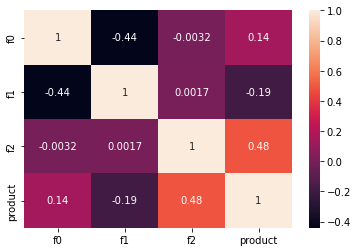

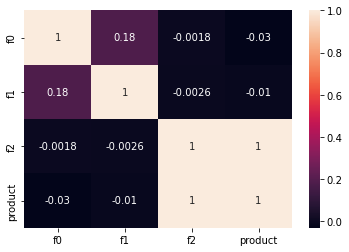

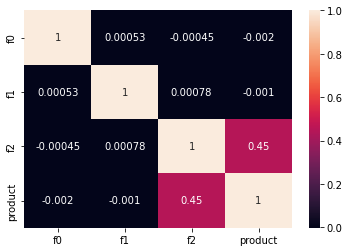

In [13]:
sns.heatmap(df1.corr(), annot = True)
plt.show()
sns.heatmap(df2.corr(), annot = True)
plt.show()
sns.heatmap(df3.corr(), annot = True)
plt.show()

# Вывод: 
Данные загружены, основаная информация о них получена, данные не требуют предобработки, пропусков и аномальных значенйи нет. Так же построены гистограммы распредлеения по целевомы признаку - количестов баррелей в скважине, заметим, что распредленеи во втором регионе сильно отличаается от 1 и 3, во втором наиболее часто встречаются значения стремящиеся в минимуму и максимуму. В первом и 3 регионе распредлееие похоже на нормальнео.

## Обучение и проверка модели

Будем использовать модель линейной регрессии:

In [5]:
model = LinearRegression()

Функция для расчета значений rmse и среднего предсказанного значения

In [6]:
def selection(features, target):
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, random_state = 99, test_size = 0.25) # разбиваем данные на валидационную и тренировочную выборки(25:75)
    
    scaler = StandardScaler() # стандартизируем данные
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    model.fit(features_train, target_train) #обучение модели
    predictions = model.predict(features_valid)
    
    rmse = mean_squared_error(target_valid, predictions, squared = False) # расчет квадратичной ошибки
    mean_pred = predictions.mean() # расчет среднего
    
    return predictions, rmse, mean_pred, target_valid

# Регион 1

In [7]:
features1 = df1[['f0', 'f1', 'f2']]
target1 = df1['product']
predictions1, rmse1, mean_pred1, target_valid1 = selection(features1, target1)

In [8]:
print(' rmse =', rmse1, '\n', 'Предсказанное среднее =', mean_pred1)

 rmse = 37.75859856040333 
 Предсказанное среднее = 92.54143347254966


# Регион 2

In [9]:
features2 = df2[['f0', 'f1', 'f2']]
target2 = df2['product']
predictions2, rmse2, mean_pred2, target_valid2 = selection(features2, target2)

In [10]:
print(' rmse =', rmse2, '\n', 'Предсказанное среднее =', mean_pred2)

 rmse = 0.8855582220133281 
 Предсказанное среднее = 68.91248625369201


# Регион 3

In [11]:
features3 = df3[['f0', 'f1', 'f2']]
target3 = df3['product']
predictions3, rmse3, mean_pred3, target_valid3 = selection(features3, target3)

In [12]:
print(' rmse =', rmse3, '\n', 'Предсказанное среднее =', mean_pred3)

 rmse = 39.743048019795516 
 Предсказанное среднее = 95.0105651471535


Оценим качество модели, то есть значения rmse с помощью кросс-валидации:

In [13]:
def selection2(features, target):
    model = LinearRegression()
    scores = cross_val_score(
        model, features, target, cv=4, scoring = 'neg_root_mean_squared_error')
    return -scores.mean()
    

In [14]:
print('rmse =', selection2(features1, target1))

rmse = 37.69416330930551


In [15]:
print('rmse =', selection2(features2, target2))

rmse = 0.8904041923531856


In [16]:
print('rmse =', selection2(features3, target3))

rmse = 40.05652390522354


# Вывод: 
Для каждого региона были получены и сохранены предсказания на валидационной выборке, значение метрики rmse, предсказанное среднее значение, целевое значение валидационной выбокри. стоит обратить внимание на размер ошибки, в двух регионах она катастрофически большая - почти 40% от среднего запаса. И только в одном регионе она минимальная. Если посмотреть корреляцию между признаками и целевой переменной, можно понять почему в одном из регионов ошибка значительно меньше.

## Подготовка к расчёту прибыли

Введем новые переменные

In [17]:
budget = 10000000000 # бюджет на 200 скважин
price_for_barrel = 450 # цена за 1 баррель
prod1_mean = df1['product'].mean() # среднее 1 риога
prod2_mean = df2['product'].mean() # среднее 2 региона
prod3_mean = df3['product'].mean() # среденее 3 региона
count = 200 # количестов скважин, которое мы будем выбирать

In [18]:
print(f'Cредний запас сырья в 1 регионе: {prod1_mean} тыс.баррелей')
print(f'Cредний запас сырья в 2 регионе: {prod2_mean} тыс.баррелей')
print(f'Cредний запас сырья в 3 регионе: {prod3_mean} тыс.баррелей')

Cредний запас сырья в 1 регионе: 92.50000000000001 тыс.баррелей
Cредний запас сырья в 2 регионе: 68.82500000000002 тыс.баррелей
Cредний запас сырья в 3 регионе: 95.00000000000004 тыс.баррелей


Минимальное количество баррелей(в тысячах) для одной скважины для окупания вложений равно:

In [19]:
print(budget / (price_for_barrel * 1000 * count), 'тыс.баррелей')

111.11111111111111 тыс.баррелей


ROI для каждого региона относительно среднего значения баррелей в процентах

In [20]:
print('Окупаемость равна ', (prod1_mean* price_for_barrel * count * 1000 - budget) / budget * 100, '%')

Окупаемость равна  -16.749999999999982 %


In [21]:
print('Окупаемость равна ', (prod2_mean* price_for_barrel * count * 1000 - budget) / budget * 100, '%')

Окупаемость равна  -38.05749999999998 %


In [22]:
print('Окупаемость равна ', (prod3_mean* price_for_barrel * count * 1000 - budget) / budget * 100, '%')

Окупаемость равна  -14.499999999999963 %


# Вывод: 
Были добавлены все нужные значения, также показаны среднее количество сырья для каждого региона и минимальный объем скважины дял окупаемости. Как оказалось, ни в одном регионе не будет прибыли, если брать в расчет среднее значение количества сырья.


## Расчёт прибыли и рисков 

###  Напишем функцию для подсчета прибыли

In [23]:
def profit(predictions, target_valid, count, budget):
    
    predictions = pd.Series(predictions, index = target_valid.index)
    max_oil_wells = predictions.sort_values(ascending = False)[:count] # выбираем лучшие 200 скважин
    max_oil_wells = target_valid[max_oil_wells.index] # по индексам лучших предскаханных скважин, выбираем реальные значения
    sum_vol = max_oil_wells.sum() # сумма в 200 лучших скважин выбранных по лучшим предсказаниям
    profit = 450000 *sum_vol - budget #считаем прибыль
    print('суммарный запас сырья в 200 лучших скважинах равен', sum_vol, 'тыс.баррелей')
    print('прибыль от этих скважин равна', profit, 'рублей' )
    #return profit

Сумма целевого значения и значние прибыли для каждого региона по 200 лучшим скважинам  в тыс. баррелей:

__Первый регион__

In [24]:
profit(predictions1, target_valid1, count, budget)

суммарный запас сырья в 200 лучших скважинах равен 29562.73334403467 тыс.баррелей
прибыль от этих скважин равна 3303230004.8156013 рублей


__Второй регион__

In [25]:
profit(predictions2, target_valid2, count, budget)

суммарный запас сырья в 200 лучших скважинах равен 27589.081548181137 тыс.баррелей
прибыль от этих скважин равна 2415086696.681511 рублей


__Третий регион__

In [26]:
profit(predictions3, target_valid3, count, budget)

суммарный запас сырья в 200 лучших скважинах равен 28157.952397101937 тыс.баррелей
прибыль от этих скважин равна 2671078578.6958714 рублей


### Посчитаем риски и прибыль для каждого региона

Функция для вычисления прибыли, которую написали ранее:

In [27]:
def revenue(predictions, target_valid, count, budget):
    
    max_oil_wells = predictions.sort_values(ascending = False)
    max_oil_wells1 = target_valid[max_oil_wells.index][:count]
  
    sum_vol = max_oil_wells1.sum()
    profit = 450000 *sum_vol - budget
    
    return profit / 1000000 # переведем в миллионы рублей

Функция bootstrap, в которой мы вычисляем пибыль 200 лучших скважинах из 500, делая так 1000 раз, и из полученных данных строим распредление.

In [28]:
def bootstrap(predictions, target_valid, count, price_for_barrel, budget):
    values = []
    state = np.random.RandomState(99)
    c = 0
    predictions = pd.Series(predictions, index = target_valid.index)

    for i in range(1000):
        target_sample = target_valid.sample(n = 500,     # выбираем 500 скважин из региона
                                    replace = True,
                                    random_state = state)
        pred_sample = predictions[target_sample.index]
        profit = revenue(pred_sample, target_sample, count, budget)
        values.append(profit)
        
        if profit < 0: # убытки
            c += 1
        
        
    values = pd.Series(values)
    low_95 = values.quantile(0.025) # 2.5% квантиль
    high_95 = values.quantile(0.975) # 97.5% квантиль
    confidence_interval = st.t.interval(0.95,                                 # доверительный интервал для среднего
                                            df = len(values) - 1,
                                            loc = values.mean(), 
                                            scale = values.sem())
    print('Среднее значение прибыли равно ', values.mean(), 'млн. руб. \n')
    print('Риск убытков ', 1. * c / 1000 * 100, '% \n')
    print('95% доверительный интервал в млн. руб. для среднего значения прибыли', confidence_interval, '\n')
    print('95% всех значений прибыли находится между',low_95,'млн.руб и', high_95,"млн.руб.")
    
    values.plot(kind = 'hist',                        # построение гистограммы распредлеения прибыли
                title = "Распределение прибыли",
                figsize = (10,6))
    plt.axvline(low_95, color='red', linestyle='--', label='2.5% quantile')
    plt.axvline(high_95, color='red', linestyle='--', label='97.5% quantile')
    plt.axvline(values.mean(), color='green', linestyle='--', label='mean')
    plt.xlabel('млн.руб.')
    plt.ylabel('частота')
    plt.legend(['2.5% quantile', '97.5% quantile', 'mean'])
    plt.show()

### Первый регион

Среднее значение прибыли равно  469.5162564555773 млн. руб. 

Риск убытков  5.0 % 

95% доверительный интервал в млн. руб. для среднего значения прибыли (452.1210464068529, 486.91146650430176) 

95% всех значений прибыли находится между -84.89320765587091 млн.руб и 1014.368338181066 млн.руб.


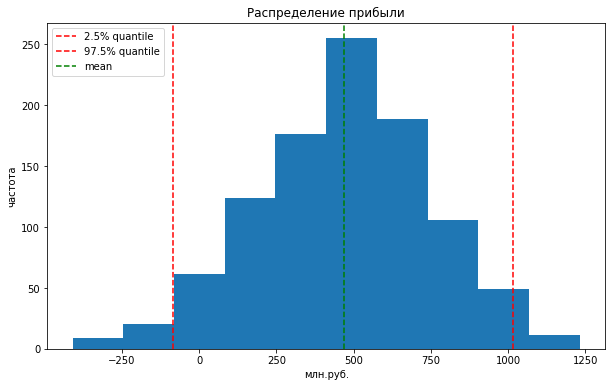

In [29]:
bootstrap(predictions1, target_valid1, count, price_for_barrel, budget)

### Второй регион

Среднее значение прибыли равно  500.0950898231163 млн. руб. 

Риск убытков  0.6 % 

95% доверительный интервал в млн. руб. для среднего значения прибыли (487.3041955140067, 512.885984132226) 

95% всех значений прибыли находится между 80.09563026653764 млн.руб и 905.8715001328502 млн.руб.


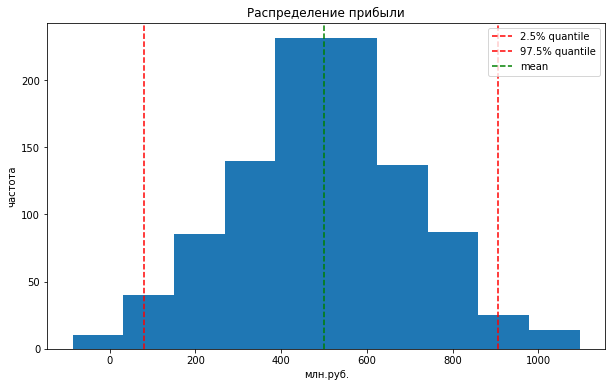

In [30]:
bootstrap(predictions2, target_valid2, count, price_for_barrel, budget)

### Третий регион

Среднее значение прибыли равно  439.2574209431004 млн. руб. 

Риск убытков  6.0 % 

95% доверительный интервал в млн. руб. для среднего значения прибыли (422.23576887955807, 456.2790730066427) 

95% всех значений прибыли находится между -121.39267009034647 млн.руб и 971.3795842534691 млн.руб.


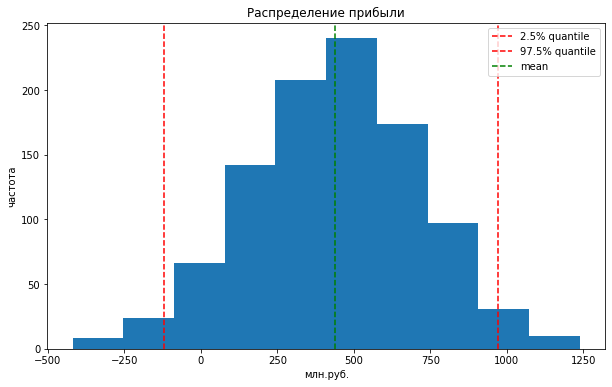

In [31]:
bootstrap(predictions3, target_valid3, count, price_for_barrel, budget)

Исходя из данных, я бы преложил выбрать второй регион, так как только в нем шанс убытков меньше 2.5%. 

Доверительный интервал в 95% указывает на то, что средняя прибыль будет находиться в интервале между 487.3 млн.руб и 512.9 млн.руб.

Значение квантилей указывают на то, что 95% вероятности прибыли лежит в диапазоне от 80.1 млн.руб до 905.9 млн.руб.

Риск убытков составляет только 0.6%, что означает, что вероятность получения убытков очень мала.

Таким образом, выбор региона с шансом убытков менее 2.5% является разумным, учитывая, что средняя прибыль составляет более 500 млн.руб и вероятность получения убытков составляет всего 0.6%.

# Выводы: 


После того, как вы построили модель и провели расчеты, можно сделать следующие выводы:

__1. Данные по трем регионам были загружены и подготвлены.__


__2. Была обучена линейная модель для каждого региона, и по результатам тестирования были получены средние значения RMSE и средних запасов предсказанного сырья:__

* Регион 1: RMSE = 37.758, Средний запас предсказанного сырья = 92.541 тыс. баррелей

* Регион 2: RMSE =  0.885, Средний запас предсказанного сырья = 68.912 тыс. баррелей

* Регион 3: RMSE = 39.743, Средний запас предсказанного сырья = 95.01 тыс. баррелей

__3. Были расчитаны объемы сырья, необходимые для безубыточной разработки новой скважины, и сравнены со средними запасами предсказанного сырья для каждого региона:__


__Средний запас в каждом регионе:__


* Cредний запас сырья в 1 регионе: 92.5 тыс.баррелей

* Cредний запас сырья в 2 регионе: 68.825 тыс.баррелей

* Cредний запас сырья в 3 регионе: 95 тыс.баррелей

__Минимальное количество баррелей для безубыточной разработки равно 111.11 тыс. быррелей__


__4. Была написана функция для расчета прибыли по выбранным скважинам и предсказаниям модели.__


__5. Были проведены расчеты рисков и прибыли для каждого региона с помощью техники Bootstrap и получены следующие результаты:__

__Регион 1:__

- средняя прибыль = Среднее значение прибыли равно  469.516 млн. руб. 
- Риск убытков  5.0 % 
- 95% доверительный интервал в млн. руб. (452.121, 486.911) 
- Значение квантилей для 95 процентного интервала -84.893 млн.руб и  1014.368 млн.руб.

__Регион 2:__
- Среднее значение прибыли равно  500.0953 млн. руб. 
- Риск убытков  0.6 % 
- 95% доверительный интервал в млн. руб. (487.304, 512.885) 
- Значение квантилей для 95 процентного интервала 80.09563026653764 млн.руб и  905.8715001328502 млн.руб.

__Регион 3:__
- Среднее значение прибыли равно  439.2574209431004 млн. руб. 
- Риск убытков  6.0 % 
- 95% доверительный интервал в млн. руб. (422.235, 456.279)  
- Значение квантилей для 95 процентного интервала -121.392 млн.руб и  971.379 млн.руб.

__6. Таким образом, можно рекомендовать для разработки скважин регион 2, так как он единсвтенный имеет значение шанса убытков меньше 2.5 процентов__